In [17]:
from collections import defaultdict

import numpy as np

from astropy import table

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# the data file is generated in "UpID ever experiments" notebook
tabs = [table.Table.read('data_for_venn_diagram.fits.gz', hdu=hdunum) for hdunum in range(1,25)]
tabs[0]

in_dr1,detectable_dr1,vel_cuts,sat_now,sat_ever
int64,int64,int64,int64,int64
0,0,0,0,0
0,0,1,0,0
0,0,0,0,0
1,1,0,1,1
0,0,0,0,0
0,0,0,0,0
0,0,0,1,1
0,0,0,1,1
0,0,0,1,1


In [27]:
firsts = tabs[::2]
seconds = tabs[1::2]

cnt_dct = defaultdict(list)

for first, second in zip(firsts, seconds):
    for nm in first.colnames:
        cnt_dct[nm].append((np.sum(first[nm]), np.sum(second[nm]))) 

cnt_dct = {k:np.array(v) for k, v in cnt_dct.items()}

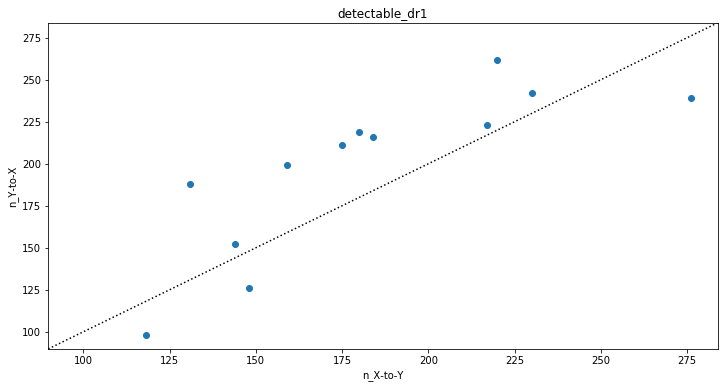

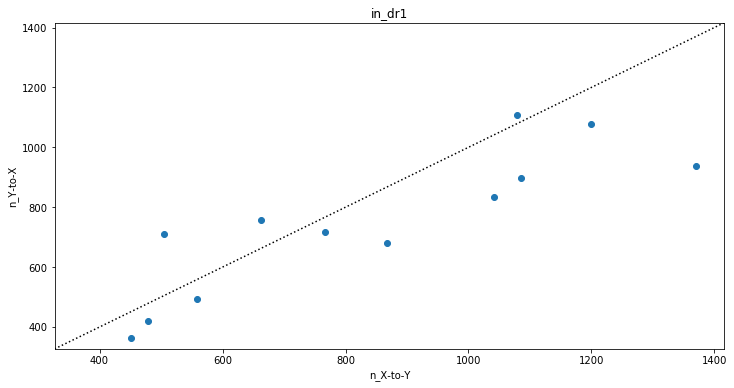

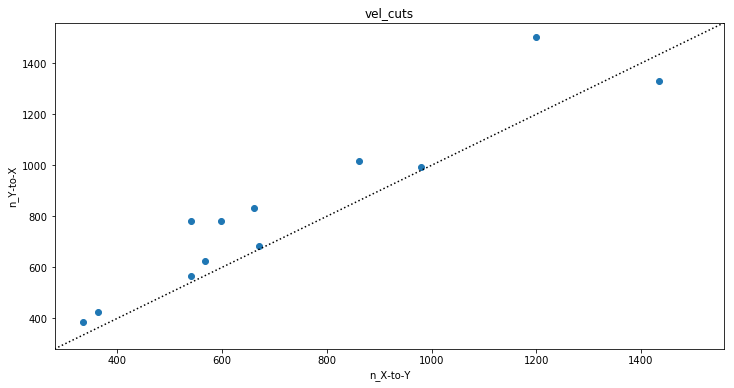

In [33]:
for nm, arr in cnt_dct.items():
    if nm in ('sat_now', 'sat_ever'):
        # these two will *always* be perfectly correlated because they have no observables
        continue
    plt.figure(figsize=(12, 6))
    plt.title(nm)
    plt.scatter(*arr.T)
    
    mn = min(plt.xlim()[0], plt.ylim()[0])
    mx = max(plt.xlim()[1], plt.ylim()[1])
    
    plt.plot([mn, mx], [mn, mx], c='k', ls=':')
    plt.xlim(mn, mx)
    plt.ylim(mn, mx)
    
    plt.xlabel('n_X-to-Y')
    plt.ylabel('n_Y-to-X')